
# Practical Introduction to Deep Learning Basics

In [3]:

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.9.2


## Load Data

In [4]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#(x_train, y_train), (x_test, y_test) = mnist.load_data(path='/gpfs/projects/nct00/nct00002/basics-utils/mnist.npz')

11490434/11490434 [==============================] - 0s 0us/step


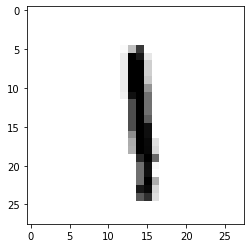

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train[8], cmap=plt.cm.binary)



In [6]:
print(y_train[8])

1


In [7]:
print(x_train.ndim)

3


In [8]:
print(x_train.shape)

(60000, 28, 28)


In [9]:
print(x_train.dtype) 

uint8


## Prepare data

In [10]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [11]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [12]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [13]:
from tensorflow.keras.utils import to_categorical


In [14]:
print(y_test[0])

7


In [15]:
print(y_train[0])

5


In [16]:
print(y_train.shape)

(60000,)


In [17]:
print(x_test.shape)

(10000, 784)


In [18]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


print(y_test[0])


[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [19]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [20]:
print(y_train.shape)

(60000, 10)


In [21]:
print(y_test.shape)

(10000, 10)


## Define Model

In [22]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input

model = Sequential()
model.add(Input(shape=(784,)))
#model.add(Dense(128, activation='relu', input_shape=(784,)))
#model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
#model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 32)                25120     
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


## Compile model (configuration)

In [24]:
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics = ['accuracy'])


## Training the model

In [25]:
model.fit(x_train, y_train, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 7s 2ms/step - loss: 0.3385 - accuracy: 0.9040
Epoch 2/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1705 - accuracy: 0.9497
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1347 - accuracy: 0.9603
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1147 - accuracy: 0.9659
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0994 - accuracy: 0.9698
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0887 - accuracy: 0.9730
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0809 - accuracy: 0.9749
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0734 - accuracy: 0.9773
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0665 - accuracy: 0.9795
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.062

## Evaluation the model

In [26]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1249 - accuracy: 0.9681


In [27]:
print('Test accuracy:', test_acc)

Test accuracy: 0.9681000113487244


In [28]:
# Look at confusion matrix 
#Note, this code is taken straight from the SKLEARN website, an nice way of viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

313/313 [==============================] - 1s 2ms/step


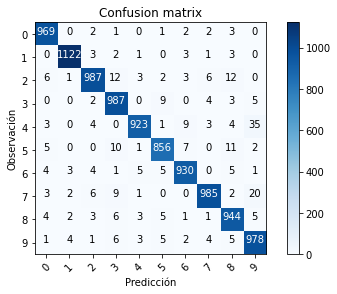

In [29]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools

# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

## Use the model 

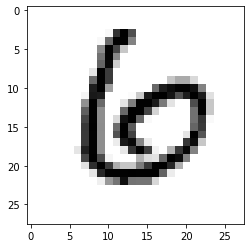

In [30]:
x_test_old = x_test.reshape(10000, 28,28)
plt.imshow(x_test_old[11], cmap=plt.cm.binary)

In [31]:
predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [32]:
np.argmax(predictions[11])

6

In [33]:
print(predictions[11])

[9.95536757e-05 1.20637484e-11 5.24693269e-06 1.02470651e-07
 1.47909613e-08 2.74083732e-07 9.91910994e-01 7.86568172e-11
 7.98389874e-03 2.05702899e-09]


In [34]:
np.sum(predictions[11])

1.0000001

# Convolutional Neural Network


In [64]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

model = Sequential()
model.add(Input(shape=(28, 28, 1)))
#model.add(Conv2D(16, (5, 5), activation='relu'))
#model.add(MaxPooling2D((2, 2)))
#model.add(Conv2D(32, (3, 3), activation='relu'))
#model.add(MaxPooling2D((2, 2)))
#model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))


#keras.Input(shape=input_shape),
#        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
#        layers.MaxPooling2D(pool_size=(2, 2)),
#        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
#        layers.MaxPooling2D(pool_size=(2, 2)),
#        layers.Flatten(),
#        layers.Dropout(0.5),
#        layers.Dense(num_classes, activation="softmax"),


from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_7 (Dropout)         (None, 1600)            

In [65]:
from tensorflow.keras.utils import to_categorical

#mnist = tf.keras.datasets.mnist(train_images, train_labels), (test_images, test_labels) = mnist.load_data(path='/gpfs/projects/nct00/nct00002/basics-utils/mnist.npz')

mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print (train_images.shape)
print (train_labels.shape)
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print (train_images.shape)
print (train_labels.shape)

(60000, 28, 28)
(60000,)
(60000, 28, 28, 1)
(60000, 10)


In [66]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [67]:
model.fit(train_images, train_labels, batch_size=100, epochs=5, verbose=1)

Epoch 1/5
600/600 [==============================] - 3s 4ms/step - loss: 0.3068 - accuracy: 0.9088
Epoch 2/5
600/600 [==============================] - 3s 5ms/step - loss: 0.0994 - accuracy: 0.9692
Epoch 3/5
600/600 [==============================] - 2s 4ms/step - loss: 0.0759 - accuracy: 0.9765
Epoch 4/5
600/600 [==============================] - 2s 4ms/step - loss: 0.0636 - accuracy: 0.9804
Epoch 5/5
600/600 [==============================] - 2s 4ms/step - loss: 0.0561 - accuracy: 0.9824


In [68]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0340 - accuracy: 0.9887
Test accuracy: 0.9886999726295471
